<a href="https://colab.research.google.com/github/NidhiSingh25901/MLAlgorithm/blob/main/LinearRegressionImbalanceDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [2]:
X, y = make_classification(n_samples=5000, n_features=10, n_informative=6, n_redundant=2,
                           n_clusters_per_class=2, weights=[0.95, 0.05],
                           random_state=42)

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(4724), np.int64(1): np.int64(276)}


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [4]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Confusion Matrix:
 [[1415    2]
 [  77    6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.75      0.07      0.13        83

    accuracy                           0.95      1500
   macro avg       0.85      0.54      0.55      1500
weighted avg       0.94      0.95      0.93      1500

ROC-AUC Score: 0.8067867801481154


In [5]:
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_balanced.fit(X_train, y_train)

y_pred_bal = model_balanced.predict(X_test)
print("Confusion Matrix (Balanced):\n", confusion_matrix(y_test, y_pred_bal))
print("\nClassification Report (Balanced):\n", classification_report(y_test, y_pred_bal))
print("ROC-AUC Score:", roc_auc_score(y_test, model_balanced.predict_proba(X_test)[:, 1]))


Confusion Matrix (Balanced):
 [[1094  323]
 [  23   60]]

Classification Report (Balanced):
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1417
           1       0.16      0.72      0.26        83

    accuracy                           0.77      1500
   macro avg       0.57      0.75      0.56      1500
weighted avg       0.93      0.77      0.83      1500

ROC-AUC Score: 0.8128916512911207


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_res))

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_res, y_res)

y_pred_smote = model_smote.predict(X_test)
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, model_smote.predict_proba(X_test)[:, 1]))


NameError: name 'model_smote' is not defined

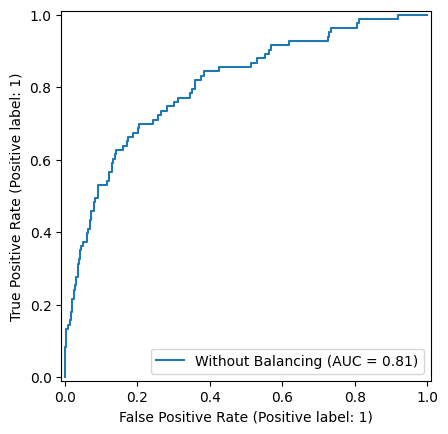

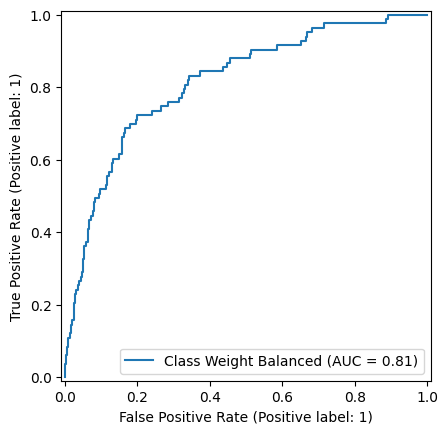

In [6]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test, name='Without Balancing')
RocCurveDisplay.from_estimator(model_balanced, X_test, y_test, name='Class Weight Balanced')
RocCurveDisplay.from_estimator(model_smote, X_test, y_test, name='SMOTE Oversampling')

plt.title("ROC Curves Comparison")
plt.show()


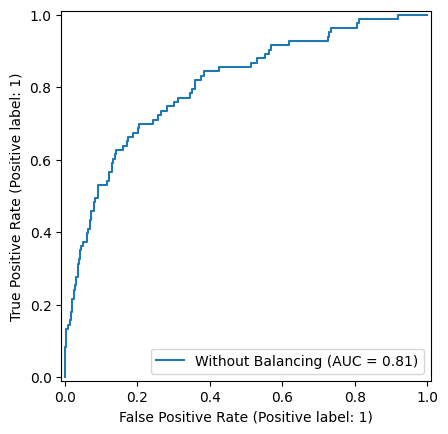

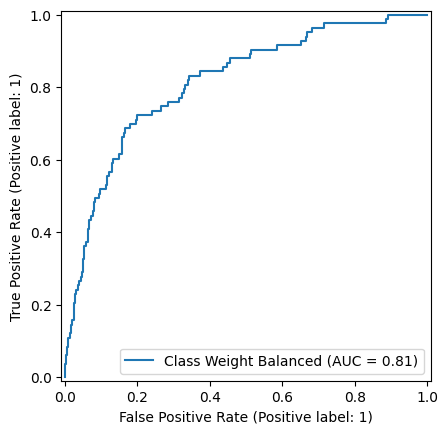

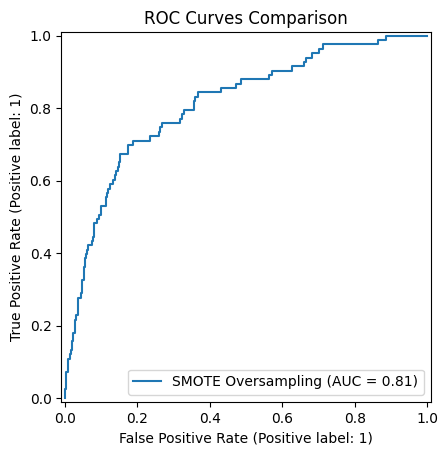

In [8]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test, name='Without Balancing')
RocCurveDisplay.from_estimator(model_balanced, X_test, y_test, name='Class Weight Balanced')
RocCurveDisplay.from_estimator(model_smote, X_test, y_test, name='SMOTE Oversampling')

plt.title("ROC Curves Comparison")
plt.show()

In [7]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_res))

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_res, y_res)

y_pred_smote = model_smote.predict(X_test)
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, model_smote.predict_proba(X_test)[:, 1]))

Before SMOTE: [3307  193]
After SMOTE: [3307 3307]
Confusion Matrix (SMOTE):
 [[1089  328]
 [  24   59]]

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1417
           1       0.15      0.71      0.25        83

    accuracy                           0.77      1500
   macro avg       0.57      0.74      0.56      1500
weighted avg       0.93      0.77      0.83      1500

ROC-AUC Score: 0.8106809737184447
